In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sv_raw = pd.read_csv("survey.csv")
sv_raw.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
sv_treat = sv_raw[sv_raw["treatment"] == "Yes"]
sv_treat.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
10,2014-08-27 11:32:44,31,Male,United States,OH,NaN,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN


In [4]:
##################################
#####Create a Function ###########
##################################
def sv_group(df, Sort_Value, agr_col):

    """ This function creates a groupby by a specific column and returns the sorted df

    df = a dataframe you want to analyse 

    Agr_value = The column that you want to aggregate"""

    sv_count_df = df.groupby(Sort_Value)[agr_col].count().reset_index()
    sv_count_df = sv_count_df.sort_values(agr_col, ascending=False).iloc[0:10]
    return sv_count_df

In [5]:
################################################
#####People in treatment per country ###########
################################################

sv_count_treat = sv_group(sv_treat,"Country", "treatment")
print(sv_count_treat)

           Country  treatment
26   United States        410
25  United Kingdom         93
5           Canada         37
10         Germany         21
12         Ireland         13
0        Australia         13
17     Netherlands          9
18     New Zealand          5
22    South Africa          4
19          Poland          4


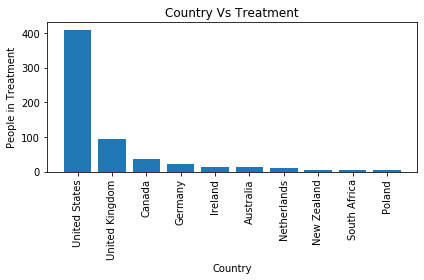

In [6]:
fig, ax = plt.subplots()
ax.bar(x=sv_count_treat.Country,height=sv_count_treat.treatment)
plt.title('Country Vs Treatment')
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('People in Treatment')
plt.tight_layout(h_pad=5)

In [7]:
sv_benef = sv_raw[sv_raw["benefits"] == "Yes"]
sv_benef.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN


In [8]:
################################################
#####Company Benefits per country ###########
################################################

sv_count_benefits = sv_group(sv_benef,"Country", "benefits")
print(sv_count_benefits)

           Country  benefits
16   United States       398
4           Canada        29
15  United Kingdom        20
7          Germany         5
9      Netherlands         4
0        Australia         4
8          Ireland         3
6           France         2
3          Belgium         2
13          Sweden         2


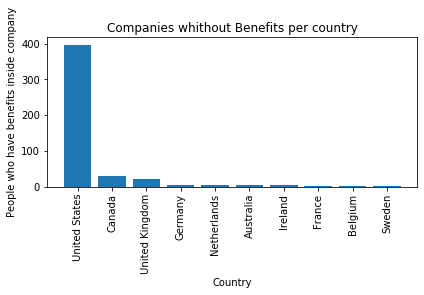

In [14]:
fig, ax = plt.subplots()
ax.bar(x=sv_count_benefits.Country,height=sv_count_benefits.benefits)
plt.title('Companies whithout Benefits per country')
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('People who have benefits inside company')
plt.tight_layout(h_pad=5)

In [18]:
################################################
#########    Companies per country ############
################################################

sv_count_companies = sv_group(sv_raw,"Country", "benefits")
print(sv_count_companies)

           Country  benefits
45   United States       751
44  United Kingdom       185
7           Canada        72
17         Germany        45
28     Netherlands        27
21         Ireland        27
0        Australia        21
15          France        13
20           India        10
29     New Zealand         8


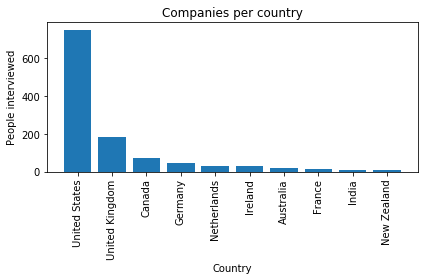

In [20]:
fig, ax = plt.subplots()
ax.bar(x=sv_count_companies.Country,height=sv_count_companies.benefits)
plt.title('Companies per country')
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('People interviewed')
plt.tight_layout(h_pad=10)